# Flower type prediction using Iris dataset

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [57]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [58]:
X= pd.DataFrame(iris.data, columns=iris.feature_names)
y= iris.target

In [59]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Create and train logistic regression model

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [61]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

### Measure accuracy of our model

In [62]:
model.score(X_test, y_test)

0.9666666666666667

### Confusion Matrix

In [63]:
y_predicted = model.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 12]], dtype=int64)

<AxesSubplot:>

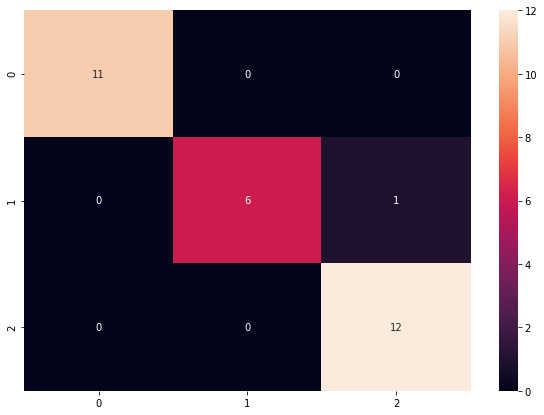

In [66]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

### Train Random Forest Classifier model

In [68]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
model.score(X_test, y_test)

0.9666666666666667